In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

### Collect the feature data and store it in a datframe

In [9]:
df = pd.read_feather(r'C:\Users\THIS PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\New Projects\Sales Analysis\Sales_data.ftr')

### There are 186850 rows of unclean data and 6 columns

In [10]:
df.shape

(186850, 6)

### There are 545 missing values in all of the 6 columns 

In [11]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### This makes a copy of the dataframe so that computation done on it will not affect the real dataframe

In [12]:
df_ = df.copy()

### This drops any missing value in a row or column

In [13]:
df_.dropna(inplace=True)

In [14]:
df_.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### After dropping the missing values there are 186305 rows and 6 columns

In [15]:
df_.shape

(186305, 6)

### This drops all missing values in the row or column

In [16]:
df.dropna(how='all', inplace=True)

### After dropping the missing values there are 186305 rows and 6 columns 

In [17]:
df.shape

(186305, 6)

### This shows that there are 618 duplicated rows

In [19]:
df[df.duplicated()].shape

(618, 6)

### This drops all the duplicated rows 

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df[df.duplicated()].shape

(0, 6)

### There are 185687 rows after dropping the missing values and the duplicates 

In [22]:
df.shape

(185687, 6)

### This displays the first 5 rows

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### This shows the data types of all the 6 columns and they are all strings

In [24]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### This gets the row that has a its date as Order Date

In [44]:
df[df['Order Date'].str.contains('Order')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### This gets all the rows except the one with Order Date as Order Date

In [46]:
df = df[~df['Order Date'].str.contains('Order')]

In [47]:
df.shape

(185686, 6)

### This converts the Order Date column from being a string to a datetime datatype

In [49]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [50]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### This gets the months from the Order Dates and also the month names from the Order Date column

In [55]:
df['Months'] = df['Order Date'].dt.month

In [56]:
df['Month Name'] = df['Order Date'].dt.month_name()

In [57]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Month Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April


In [58]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Months                       int64
Month Name                  object
dtype: object

### This will convert the Quantity Ordered column from being a string to an integer

In [60]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')

### This will convert the Price Each column from being a string to a float

In [61]:
df['Price Each'] = df['Price Each'].astype('float')

In [62]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Months                       int64
Month Name                  object
dtype: object

### This creates a sales column that stores the product of Quantity Ordered and Price Each

In [63]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [64]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Month Name,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99


### This will get the total sales for each month

In [79]:
month_sales = df.groupby(['Month Name', 'Months'])['Sales'].sum().reset_index().sort_values('Months')
month_sales

,Month Name,Months,Sales
4,January,1,1821413.16
3,February,2,2200078.08
7,March,3,2804973.35
0,April,4,3389217.98
8,May,5,3150616.23
6,June,6,2576280.15
5,July,7,2646461.32
1,August,8,2241083.37
11,September,9,2094465.69
10,October,10,3734777.86


### This shows that in the month december there is the maximum total sales of 4.608295m

In [80]:
px.bar(data_frame=month_sales, x='Month Name', y='Sales')

### This creates a function that splits a string that has commas in it into a list and takes the second item of the list

In [84]:
def get_city(address):
    return address.split(',')[1]

### Apply the function on the Purchase Address to get their respective Cities

In [87]:
df['City'] = df['Purchase Address'].apply(get_city)

### This is another approach to get the city names from the Purchase Address column

In [111]:
df['Purchase Address'].str.split(',').str.get(1)

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase Address, Length: 185686, dtype: object

In [105]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Month Name,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles


### This gets the various cities total number of orders using the groupby approach

In [97]:
city_orders = df.groupby('City')['Quantity Ordered'].count().reset_index().sort_values('Quantity Ordered')

In [98]:
city_orders

,City,Quantity Ordered
1,Austin,9890
6,Portland,12449
8,Seattle,14713
3,Dallas,14797
0,Atlanta,14863
2,Boston,19901
5,New York City,24847
4,Los Angeles,29564
7,San Francisco,44662


### This gets the various cities total number of orders using the value_counts approach

In [103]:
city_orders_2 = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index': 'City', 'City': 'Quantity Ordered'})

In [104]:
city_orders_2

,City,Quantity Ordered
0,San Francisco,44662
1,Los Angeles,29564
2,New York City,24847
3,Boston,19901
4,Atlanta,14863
5,Dallas,14797
6,Seattle,14713
7,Portland,12449
8,Austin,9890


### This shows that the city with the highest numberof orders is San Francisco followed by Los Angeles then New York City and the rest follows

In [107]:
px.pie(data_frame=city_orders, names='City', values='Quantity Ordered')

### This will group the data by the Product Column and it will find the sum of the Quantity Ordered Column and the mean of the Price Each column

In [126]:
agg_df = df.groupby('Product').agg({'Quantity Ordered':'sum', 'Price Each':'mean'}).reset_index()

In [127]:
agg_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


### This creates a line plot and a bar plot on the same figure. from this graph we can see that there is a correlation between the Price Each column and the Quantity Ordered column. The lower the price the higher the number of the orders and vice versa

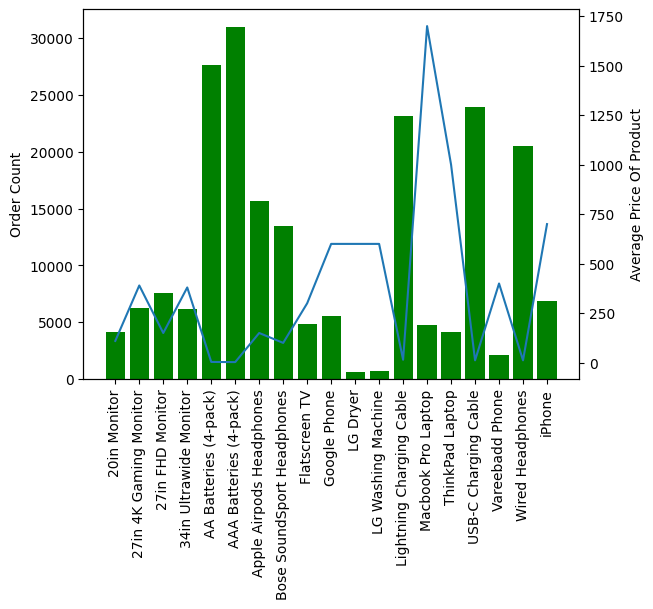

In [137]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(agg_df['Product'], agg_df['Quantity Ordered'], color='green')
ax2.plot(agg_df['Product'], agg_df['Price Each'])
ax1.set_xticklabels(agg_df.Product.values ,rotation= 'vertical')
ax1.set_ylabel('Order Count')
ax2.set_ylabel('Average Price Of Product')
plt.show()

### This creates a pivot table for the Month and Product colums to see if there is any relationship between those two

In [140]:
pd.crosstab(df['Month Name'], df['Product'])

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Month Name,,,,,,,,,,,,,,,,,,,
April,387,564,733,650,2062,1988,1507,1277,458,580,78,61,2197,452,390,2074,220,1888,691
August,258,437,484,378,1357,1340,998,871,331,359,46,48,1354,298,274,1339,141,1191,439
December,567,861,959,845,2716,2828,2051,1803,661,714,86,80,2887,643,537,2979,284,2537,906
February,245,424,471,415,1274,1320,1009,829,312,379,38,40,1393,276,275,1511,129,1179,438
January,215,313,421,313,1037,1084,812,659,244,317,39,42,1069,235,218,1171,125,1004,381
July,324,483,601,460,1555,1554,1212,1048,396,410,55,52,1690,368,319,1667,146,1434,501
June,321,451,561,454,1540,1451,1152,969,366,391,43,55,1560,355,314,1531,155,1334,532
March,323,478,605,520,1672,1645,1308,1181,358,463,49,64,1749,379,345,1766,174,1512,537
May,338,541,688,543,1821,1888,1354,1165,399,479,76,64,1929,463,371,1879,185,1729,640


### This gets the top 5 most sold products

In [142]:
most_sold_product = df['Product'].value_counts()[:5].index

### This gets the data for the top 5 most sold products

In [145]:
top_5 = df[df['Product'].isin(most_sold_product)]

In [146]:
top_5.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Month Name,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,April,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,April,11.95,Atlanta


### This creates a pivot table between the month and the top 5 most sold products using pandas crosstab function

In [151]:
pd.crosstab(top_5['Month Name'], top_5['Product']).reset_index()

### This creates a pivot table between the month and the top 5 most sold products using pandas groupby function

In [165]:
top_5_df = top_5.groupby(['Month Name', 'Months', 'Product']).size().unstack().sort_values('Months').reset_index()

In [166]:
top_5_df

Product,Month Name,Months,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
0,January,1,1037,1084,1069,1171,1004
1,February,2,1274,1320,1393,1511,1179
2,March,3,1672,1645,1749,1766,1512
3,April,4,2062,1988,2197,2074,1888
4,May,5,1821,1888,1929,1879,1729
5,June,6,1540,1451,1560,1531,1334
6,July,7,1555,1554,1690,1667,1434
7,August,8,1357,1340,1354,1339,1191
8,September,9,1314,1281,1324,1451,1173
9,October,10,2240,2234,2414,2437,2091


### This displays the columns names

In [167]:
top_5_df.columns

Index(['Month Name', 'Months', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Lightning Charging Cable',
       'USB-C Charging Cable', 'Wired Headphones'],
      dtype='object', name='Product')

### This creates a line plot for all the columns except the first 2

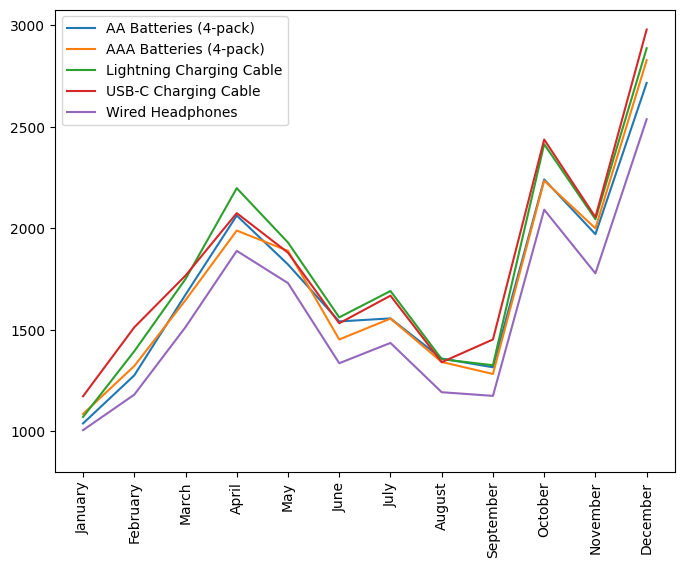

In [178]:
plt.figure(figsize=(8, 6))
for col in top_5_df.columns[2:]:
    plt.plot(top_5_df['Month Name'], top_5_df[col], label=col)
plt.xticks(rotation='vertical')
plt.ylim(bottom=800)
plt.legend(loc=2)
plt.show()

### This gets all the rows with duplicate order ids

In [187]:
duplicates = df[df['Order ID'].duplicated(keep=False)]

In [188]:
duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Month Name,Sales,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,September,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,September,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,September,5.98,Atlanta
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,September,600.00,San Francisco


### This joins the repeating order id order with a comma and store the data returned in a dataframe

In [194]:
dup = duplicates.groupby('Order ID')['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product': 'Grouped Product'})

In [195]:
dup

,Order ID,Grouped Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


### Merge the 2 duplicate dataframe on the basis of the Orer ID and with the priority on the left dataframe

In [199]:
duplicates_df = duplicates.merge(dup, on='Order ID', how='left')

In [200]:
duplicates_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Month Name,Sales,City,Grouped Product
0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,September,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,September,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,September,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,September,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


### Remove all the duplicate Order ID

In [203]:
duplicates_df.drop_duplicates(subset='Order ID', inplace=True)

In [204]:
duplicates_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Month Name,Sales,City,Grouped Product
0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,April,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,April,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,2019-09-28 13:07:00,"795 Willow St, New York City, NY 10001",9,September,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",9,September,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,September,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,September,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


### Get the top 5 Grouped Products count and store it in a dataframe

In [214]:
top_5_prod = duplicates_df['Grouped Product'].value_counts()[:5].reset_index().rename(columns={'index': 'Grouped Product', 'Grouped Product':'Count'})

In [215]:
top_5_prod

,Grouped Product,Count
0,"iPhone,Lightning Charging Cable",886
1,"Google Phone,USB-C Charging Cable",857
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303


### FRom the pie chart we can see that the Grouped Product with the highest count is the iPhone,Lightning Charging Cable Grouped Product

In [217]:
px.pie(data_frame=top_5_prod, names='Grouped Product', values='Count')